In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load csv file
df = pd.read_csv("Fish.csv")
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
#checking the missing value,shape of the dataset
df.Species.value_counts()
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


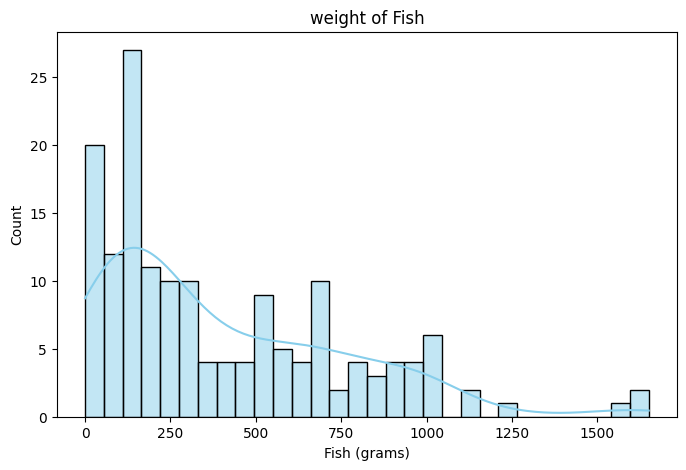

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Weight"], bins=30, kde=True, color="skyblue")
plt.title("weight of Fish")
plt.xlabel("Fish (grams)")
plt.ylabel("Count")
plt.show()

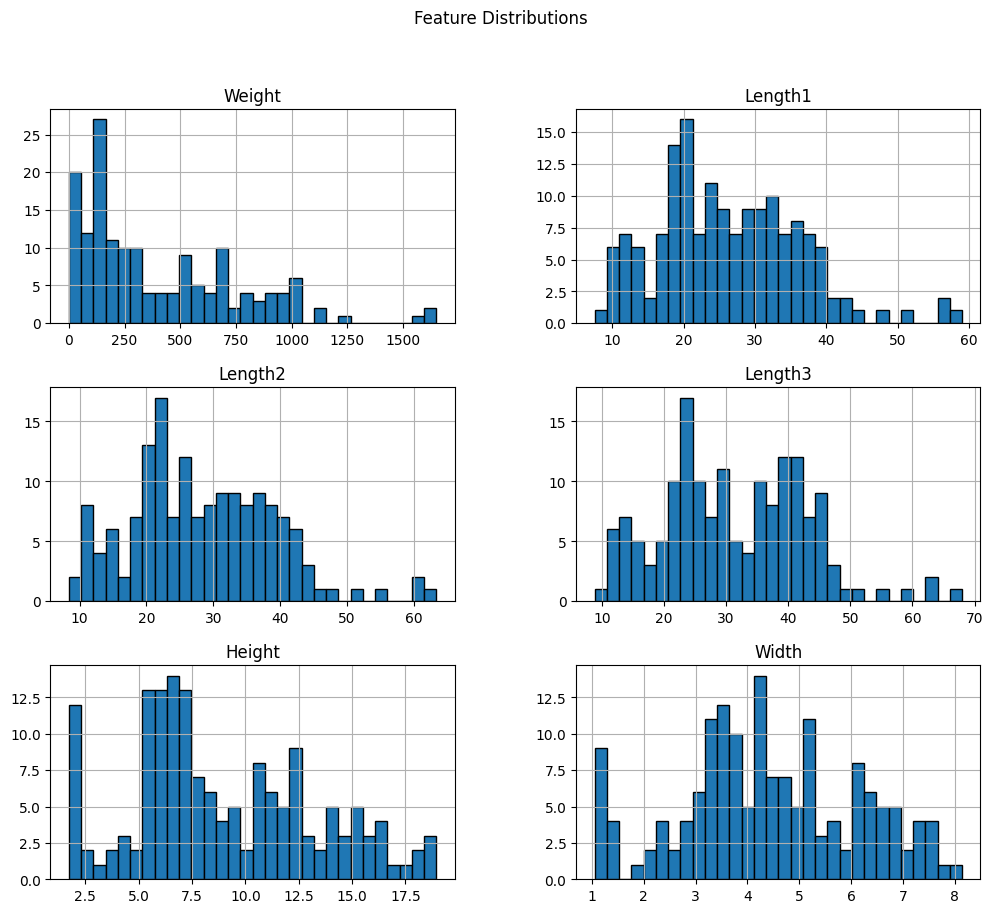

In [ ]:
# Plot histograms for all features
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()


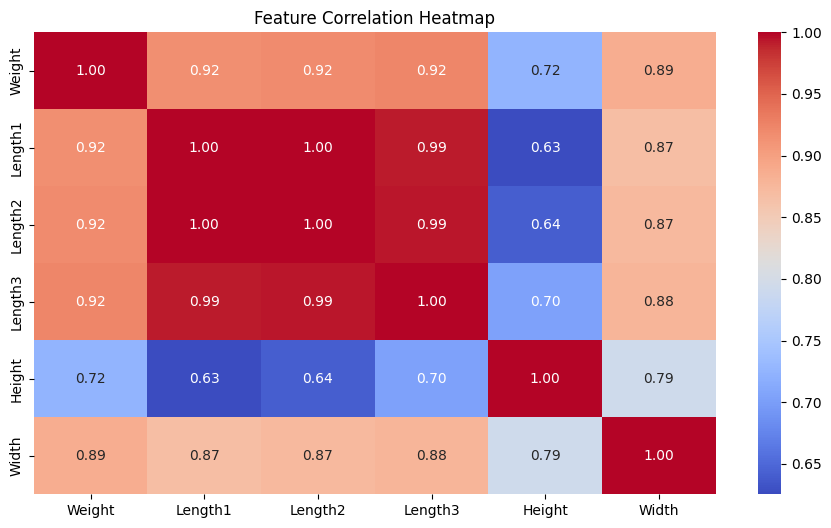

In [ ]:
# Compute correlation matrix
df_numeric = df.select_dtypes(include=["number"])  # Select only numeric columns

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(11,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# TASK 1 : Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

data=pd.read_csv('Fish.csv')

#select the features and target
X=data[['Length1','Length2','Length3','Height','Width']]
y=data['Weight']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#ols model


# Add a constant for OLS regression
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)

# Train the OLS Model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Predict on test data
y_pred = ols_model.predict(X_test_ols)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("OLS Regression Results:")
print(ols_model.summary())

Mean Squared Error: 16763.8872
R-squared: 0.8821
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     184.2
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           8.10e-55
Time:                        08:53:05   Log-Likelihood:                -787.66
No. Observations:                 127   AIC:                             1587.
Df Residuals:                     121   BIC:                             1604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
#Linear Regression

# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Mean Squared Error: 16763.8872
R-squared: 0.8821
Intercept: 386.7945
Coefficients:
Length1: 432.2747
Length2: 83.0130
Length3: -288.5680
Height: 92.5232
Width: 44.0674


# TASK 2: Ridge and Lasso Regression

# With feature scaling but not removal of outliers

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108774.4448828653, tolerance: 1307.1945102178217
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59630.78590116091, tolerance: 1182.2963117029706
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5593.203736258205, tolerance: 1267.629976754902
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceW

Ridge Regression (Best Alpha: 10.0):
MSE: 17488.5753, R-squared: 0.8770
Coefficients:
Length1: 83.2902
Length2: 80.6050
Length3: 64.9174
Height: 35.7986
Width: 77.0151

Lasso Regression (Best Alpha: 1.0):
MSE: 17458.6532, R-squared: 0.8773
Coefficients:
Length1: 229.9634
Length2: 0.0000
Length3: 0.0000
Height: 44.0153
Width: 75.7805
OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8770
Ridge Regression MSE: 17488.5753
Lasso Regression R^2 score: 0.8773
Lasso Regression MSE: 17458.6532

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 432.27472554   83.01304108 -288.56797575   92.52321581   44.06740907]

Ridge Regression Coefficients:
 [83.29023683 80.60503657 64.91737168 35.7986499  77.01514167]

Lasso Regressio

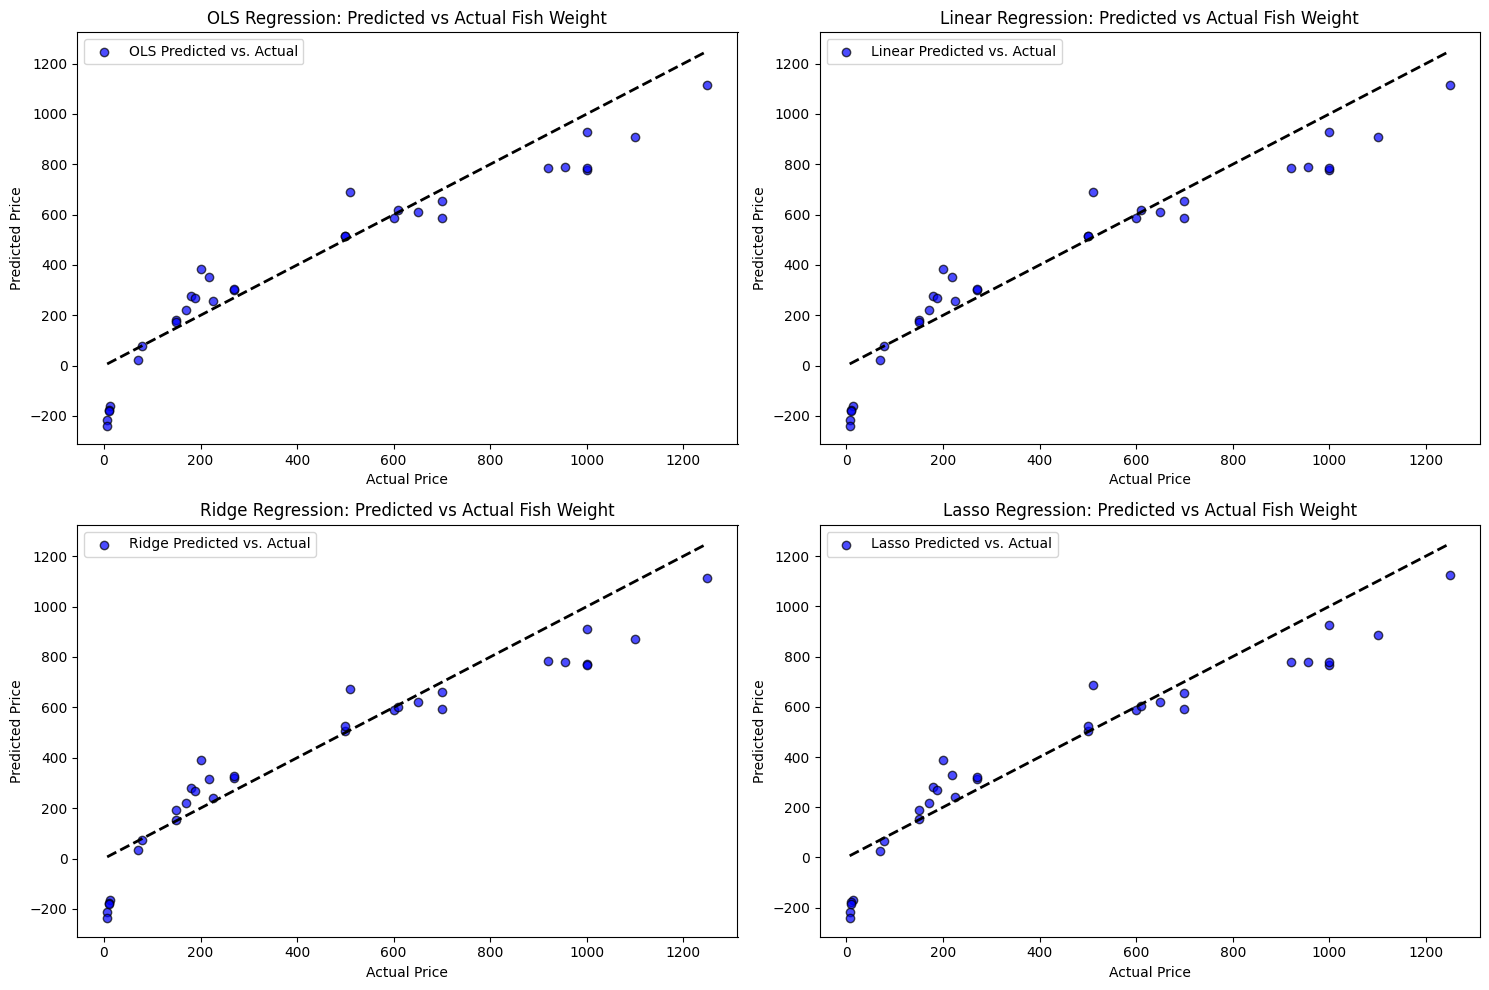

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
# Ridge Regression with cross-validation
ridge_alphas = [0.1, 1.0, 10.0, 100.0]
ridge_model = RidgeCV(alphas=ridge_alphas)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Lasso Regression with cross-validation
lasso_alphas = [0.1, 1.0, 10.0, 100.0]
lasso_model = LassoCV(alphas=lasso_alphas)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Print model performance
print(f"Ridge Regression (Best Alpha: {ridge_model.alpha_}):\nMSE: {ridge_mse:.4f}, R-squared: {ridge_r2:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nLasso Regression (Best Alpha: {lasso_model.alpha_}):\nMSE: {lasso_mse:.4f}, R-squared: {lasso_r2:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(f"{feature}: {coef:.4f}")
# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)
print("\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Fish Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()

# WITH FEATURE EXTRACTION AND OUTLIER REMOVAL FROM DATA

In [ ]:
#outlier counts
for k, v in df.items():
    if df[k].dtype == 'object':
        continue
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)]
    num_outliers = len(v_col)
    print(f"Column '{k}' has {num_outliers} outliers")

Column 'Weight' has 3 outliers
Column 'Length1' has 3 outliers
Column 'Length2' has 3 outliers
Column 'Length3' has 1 outliers
Column 'Height' has 0 outliers
Column 'Width' has 0 outliers


In [ ]:
#removal of outliers
def remove_outliers(df):
    new_df = df.copy()

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]

    return new_df
cleaned_df = remove_outliers(df)
cleaned_df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
#checking agai if the outliers are there or not
for k, v in cleaned_df.items():
    if cleaned_df[k].dtype == 'object':
        continue
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)]
    num_outliers = len(v_col)
    print(f"Column '{k}' has {num_outliers} outliers")

Column 'Weight' has 0 outliers
Column 'Length1' has 0 outliers
Column 'Length2' has 0 outliers
Column 'Length3' has 0 outliers
Column 'Height' has 0 outliers
Column 'Width' has 0 outliers


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168152.03118992737, tolerance: 902.8671261818182
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410096.1198367185, tolerance: 902.8671261818182
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459165.4350833531, tolerance: 902.8671261818182
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWa

OLS Regression R^2 score: 0.9129
OLS Regression MSE: 10023.9116
Linear Regression R^2 score: 0.9129
Linear Regression MSE: 10023.9116
Ridge Regression R^2 score: 0.9126
Ridge Regression MSE: 10061.1562
Lasso Regression R^2 score: 0.9136
Lasso Regression MSE: 9944.8446

OLS Regression Coefficients:
 const     -403.857178
Length1    125.349991
Length2    -61.771958
Length3    -42.305317
Height      39.098465
Width       49.889429
dtype: float64

Linear Regression Coefficients:
 [1093.85554688 -579.04353702 -432.74338172  161.26365093   82.48988391]

Ridge Regression Coefficients:
 [ 482.43207705  -42.92239053 -340.86478979  126.62869639   91.72050921]

Lasso Regression Coefficients:
 [ 825.74656851 -330.35405325 -406.72537894  148.61272539   85.10428061]


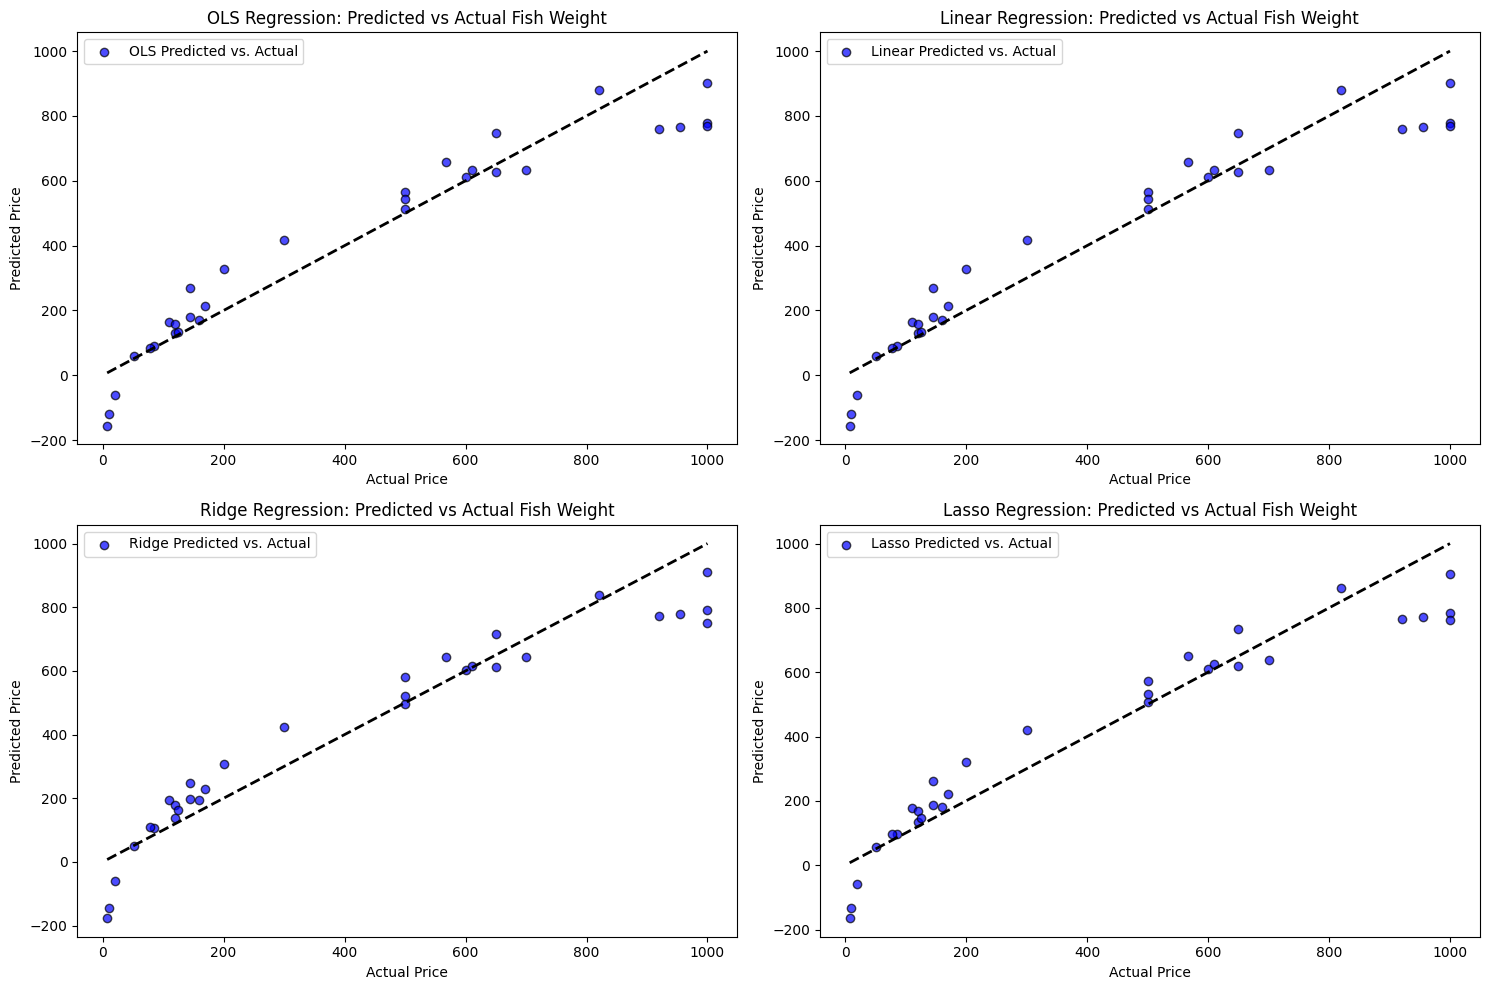

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

X = cleaned_df[['Length1', 'Length2', 'Length3', 'Height','Width']]
y= cleaned_df['Weight']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Fish Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()
